In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 1. Memahami Data (Data Understanding)
# Masukkan file dataset
try:
    df = pd.read_csv('Foodpanda Analysis Dataset.csv')
except FileNotFoundError:
    print("File tidak ditemukan. Silakan unggah file.")
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)

In [14]:
# Mengecek struktur dataset
print("Lima baris pertama dataset:")
print(df.head())

Lima baris pertama dataset:
  customer_id  gender     age      city signup_date order_id order_date  \
0       C5663    Male   Adult  Peshawar   1/14/2024    O9663  8/23/2023   
1       C2831    Male   Adult    Multan    7/7/2024    O6831  8/23/2023   
2       C2851   Other  Senior    Multan   6/20/2025    O6851  8/23/2023   
3       C1694  Female  Senior  Peshawar    9/5/2023    O5694  8/23/2023   
4       C4339   Other  Senior    Lahore  12/29/2023    O8339  8/24/2023   

  restaurant_name dish_name category  quantity    price payment_method  \
0      McDonald's    Burger  Italian         5  1478.27           Cash   
1             KFC    Burger  Italian         3   956.04         Wallet   
2       Pizza Hut     Fries  Italian         2   882.51           Cash   
3          Subway     Pizza  Dessert         4   231.30           Card   
4             KFC  Sandwich  Dessert         1  1156.69           Cash   

   order_frequency last_order_date  loyalty_points   churned  rating  \
0   

In [15]:
print("\nInformasi dataset:")
df.info()
print("\nStatistik deskriptif:")
print(df.describe(include='all'))


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 

In [16]:
# Mengecek missing values
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())


Jumlah missing values per kolom:
customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64


In [17]:
# Mengecek data duplikat
print("\nJumlah duplikat:", df.duplicated().sum())


Jumlah duplikat: 0


In [19]:
# 2. Membersihkan Data (Data Cleaning)
# Menghapus duplikat jika ada
df.drop_duplicates(inplace=True)
print("\nJumlah duplikat setelah dibersihkan:", df.duplicated().sum())


Jumlah duplikat setelah dibersihkan: 0


In [20]:
# Mengisi missing values pada kolom 'rating' dengan nilai median
df['rating'].fillna(df['rating'].median(), inplace=True)
print("\nJumlah missing values setelah dibersihkan:")
print(df.isnull().sum())


Jumlah missing values setelah dibersihkan:
customer_id        0
gender             0
age                0
city               0
signup_date        0
order_id           0
order_date         0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
last_order_date    0
loyalty_points     0
churned            0
rating             0
rating_date        0
delivery_status    0
dtype: int64


/tmp/ipython-input-22623453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=True)


In [22]:
# 3. Transformasi Data (Data Transformation)
# Mengubah kolom tanggal menjadi format datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['order_date'] = pd.to_datetime(df['order_date'])
df['last_order_date'] = pd.to_datetime(df['last_order_date'])
df['rating_date'] = pd.to_datetime(df['rating_date'])

In [23]:
# Mengubah kolom 'churned' menjadi tipe data Boolean untuk analisis yang lebih mudah
df['churned'] = df['churned'].map({'Active': False, 'Inactive': True})

In [24]:
# Membuat variabel baru (fitur) 'order_month' dari tanggal pesanan
df['order_month'] = df['order_date'].dt.to_period('M')

In [25]:
# Membuat fitur baru 'price_per_item'
df['price_per_item'] = df['price'] / df['quantity']

In [26]:
# 4. Analisis Awal (Exploratory Data Analysis - EDA)
# Menghitung statistik deskriptif untuk fitur baru
print("\nStatistik deskriptif untuk 'price_per_item':")
print(df['price_per_item'].describe())


Statistik deskriptif untuk 'price_per_item':
count    6000.000000
mean      367.786148
std       322.803695
min        20.060000
25%       149.213750
50%       265.493750
75%       461.621667
max      1499.680000
Name: price_per_item, dtype: float64


In [27]:
# Membuat tabel ringkasan sederhana
print("\nJumlah pesanan per kota:")
print(df['city'].value_counts())


Jumlah pesanan per kota:
city
Multan       1256
Lahore       1217
Peshawar     1195
Islamabad    1187
Karachi      1145
Name: count, dtype: int64


In [28]:
print("\nDistribusi gender:")
print(df['gender'].value_counts())


Distribusi gender:
gender
Female    2018
Male      2017
Other     1965
Name: count, dtype: int64


In [29]:
print("\nDistribusi status pengiriman:")
print(df['delivery_status'].value_counts())


Distribusi status pengiriman:
delivery_status
Delivered    2060
Delayed      1972
Cancelled    1968
Name: count, dtype: int64


In [30]:
print("\nDistribusi metode pembayaran:")
print(df['payment_method'].value_counts())


Distribusi metode pembayaran:
payment_method
Cash      2039
Card      2002
Wallet    1959
Name: count, dtype: int64


In [31]:
print("\nDistribusi rating:")
print(df['rating'].value_counts())


Distribusi rating:
rating
3    1243
4    1223
1    1203
2    1166
5    1165
Name: count, dtype: int64


In [32]:
# Menampilkan 5 baris pertama setelah transformasi
print("\nDataFrame setelah transformasi:")
print(df.head())


DataFrame setelah transformasi:
  customer_id  gender     age      city signup_date order_id order_date  \
0       C5663    Male   Adult  Peshawar  2024-01-14    O9663 2023-08-23   
1       C2831    Male   Adult    Multan  2024-07-07    O6831 2023-08-23   
2       C2851   Other  Senior    Multan  2025-06-20    O6851 2023-08-23   
3       C1694  Female  Senior  Peshawar  2023-09-05    O5694 2023-08-23   
4       C4339   Other  Senior    Lahore  2023-12-29    O8339 2023-08-24   

  restaurant_name dish_name category  ...  payment_method  order_frequency  \
0      McDonald's    Burger  Italian  ...            Cash               38   
1             KFC    Burger  Italian  ...          Wallet               24   
2       Pizza Hut     Fries  Italian  ...            Cash               42   
3          Subway     Pizza  Dessert  ...            Card               27   
4             KFC  Sandwich  Dessert  ...            Cash               35   

  last_order_date  loyalty_points churned  rati

/tmp/ipython-input-783988783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='viridis')


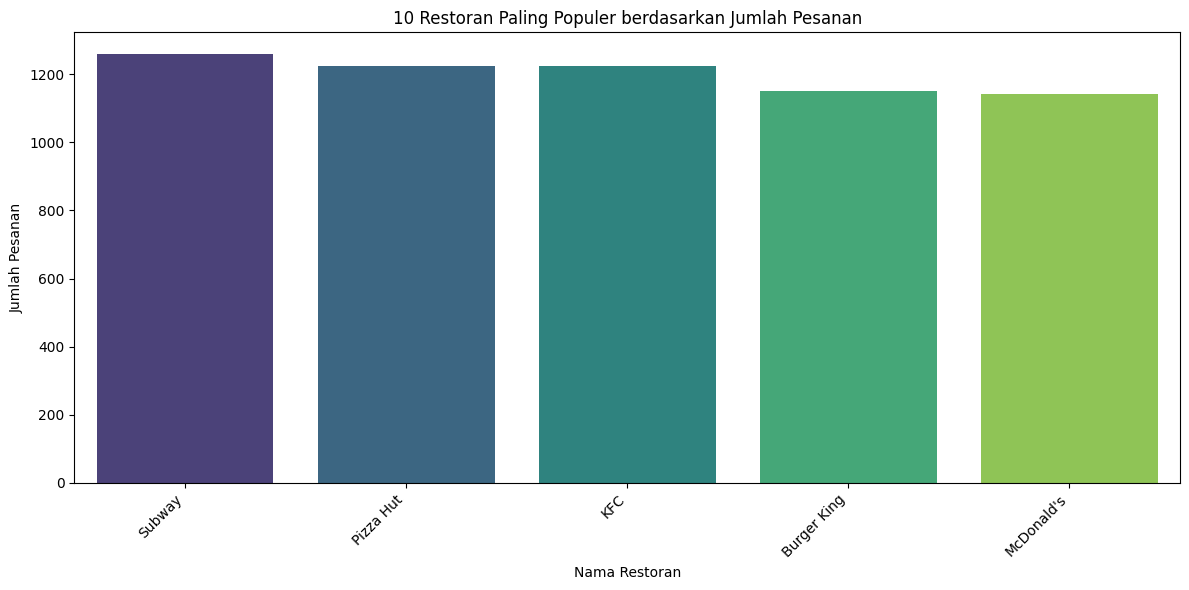

In [33]:
# 5. Visualisasi Data
# Visualisasi 1: Grafik Batang Restoran Paling Populer
plt.figure(figsize=(12, 6))
top_restaurants = df['restaurant_name'].value_counts().nlargest(10)
sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='viridis')
plt.title('10 Restoran Paling Populer berdasarkan Jumlah Pesanan')
plt.xlabel('Nama Restoran')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

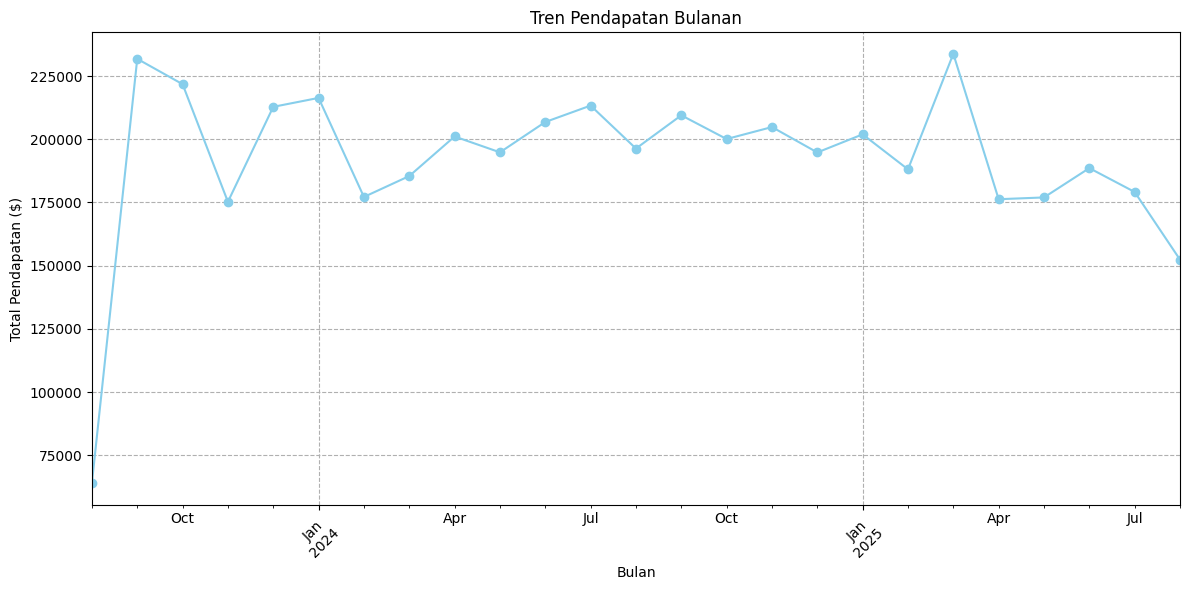

In [34]:
# Visualisasi 2: Grafik Garis Tren Pendapatan Bulanan
monthly_revenue = df.groupby('order_month')['price'].sum()
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='skyblue')
plt.title('Tren Pendapatan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

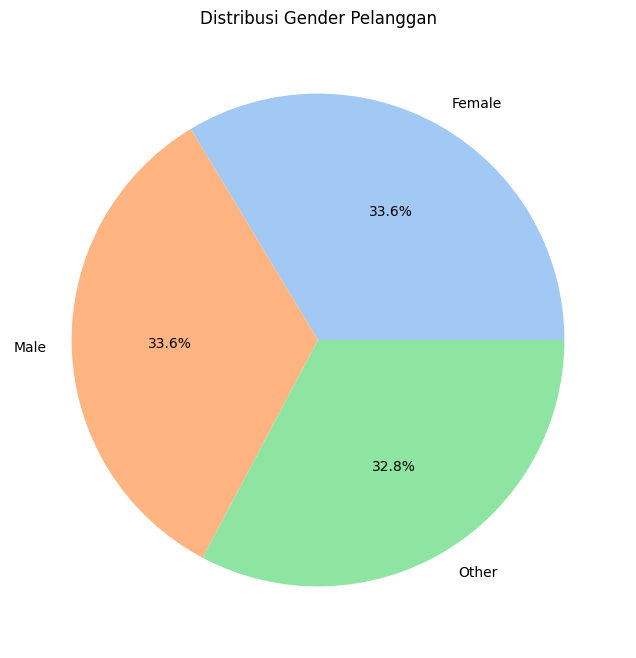

In [35]:
# Visualisasi 3: Diagram Lingkaran Distribusi Gender Pelanggan
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribusi Gender Pelanggan')
plt.show()

/tmp/ipython-input-2241141464.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_restaurant.index, y=avg_rating_per_restaurant.values, palette='magma')


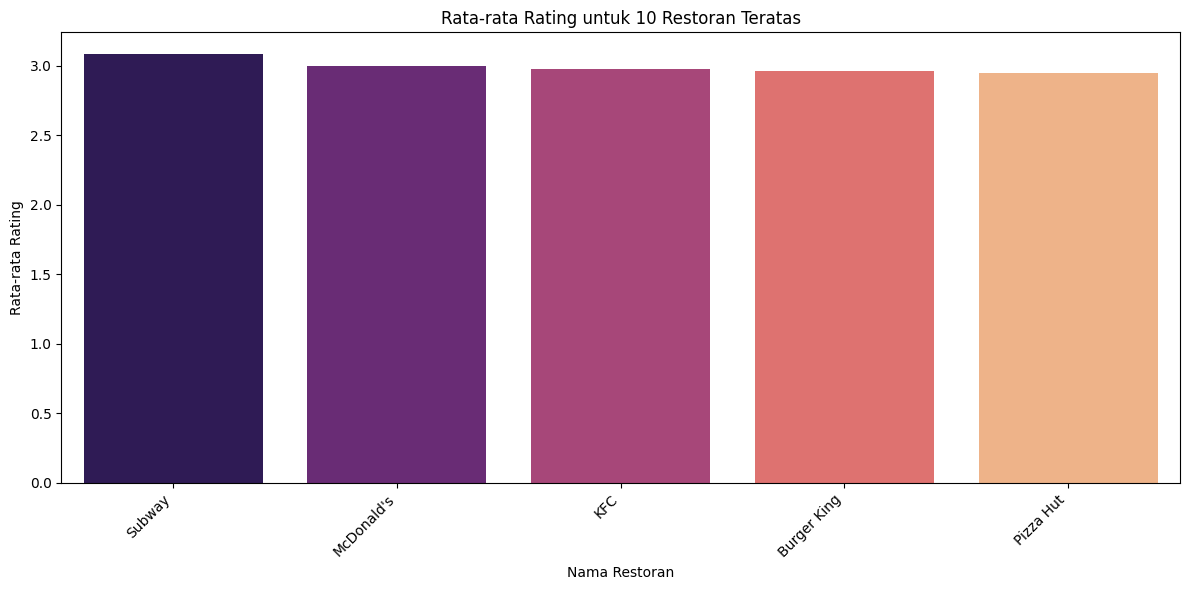

In [36]:
# Visualisasi 4: Grafik Batang Rating Rata-rata per Restoran
avg_rating_per_restaurant = df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_restaurant.index, y=avg_rating_per_restaurant.values, palette='magma')
plt.title('Rata-rata Rating untuk 10 Restoran Teratas')
plt.xlabel('Nama Restoran')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1914939441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_status_counts.index, y=delivery_status_counts.values, palette='Set2')


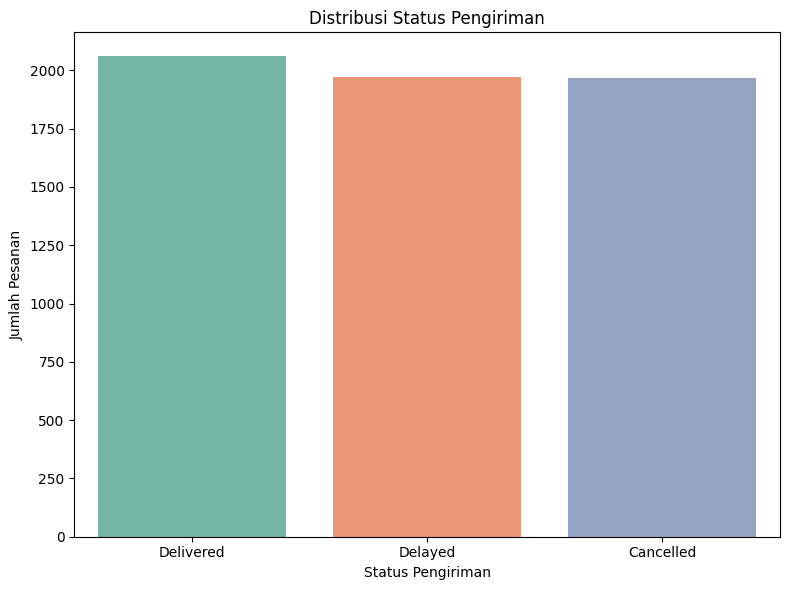

In [37]:
# Visualisasi 5: Grafik Batang Status Pengiriman
plt.figure(figsize=(8, 6))
delivery_status_counts = df['delivery_status'].value_counts()
sns.barplot(x=delivery_status_counts.index, y=delivery_status_counts.values, palette='Set2')
plt.title('Distribusi Status Pengiriman')
plt.xlabel('Status Pengiriman')
plt.ylabel('Jumlah Pesanan')
plt.tight_layout()
plt.show()

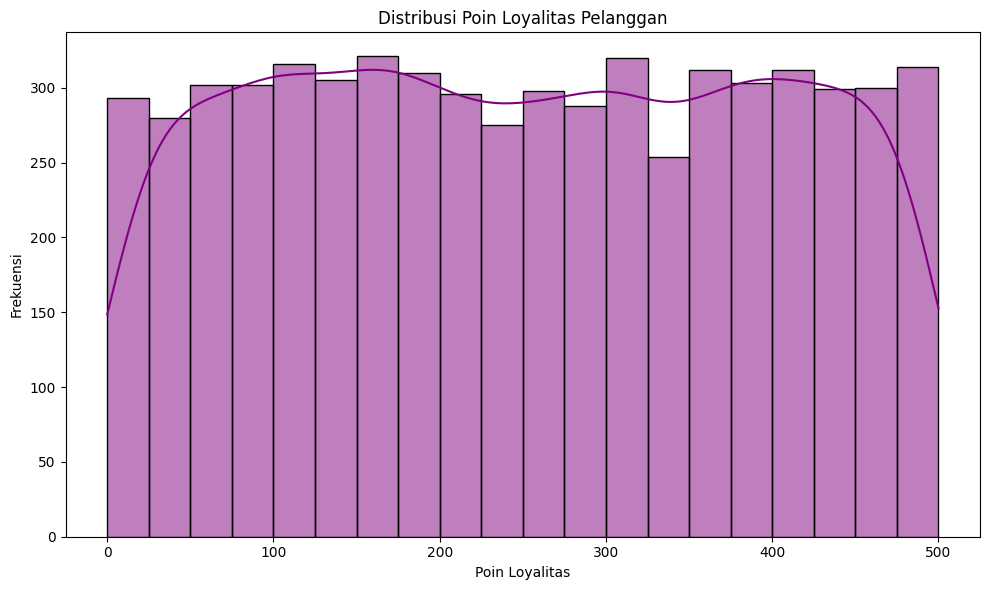

In [38]:
# Visualisasi 6: Histogram Poin Loyalitas
plt.figure(figsize=(10, 6))
sns.histplot(df['loyalty_points'], bins=20, kde=True, color='purple')
plt.title('Distribusi Poin Loyalitas Pelanggan')
plt.xlabel('Poin Loyalitas')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1857144075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_delivery_status.index, y=avg_rating_by_delivery_status.values, palette='coolwarm')


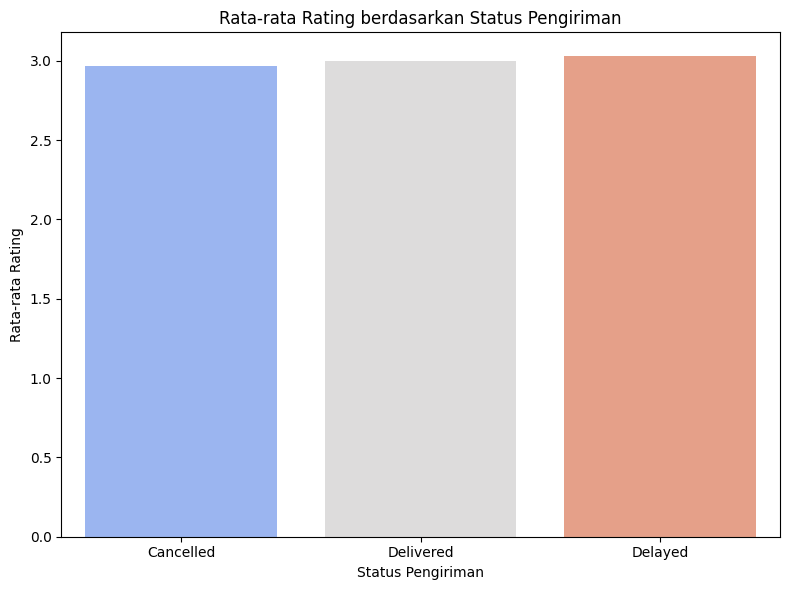

In [39]:
# Visualisasi 7: Grafik Batang Rata-rata Rating berdasarkan Status Pengiriman
avg_rating_by_delivery_status = df.groupby('delivery_status')['rating'].mean().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_delivery_status.index, y=avg_rating_by_delivery_status.values, palette='coolwarm')
plt.title('Rata-rata Rating berdasarkan Status Pengiriman')
plt.xlabel('Status Pengiriman')
plt.ylabel('Rata-rata Rating')
plt.tight_layout()
plt.show()

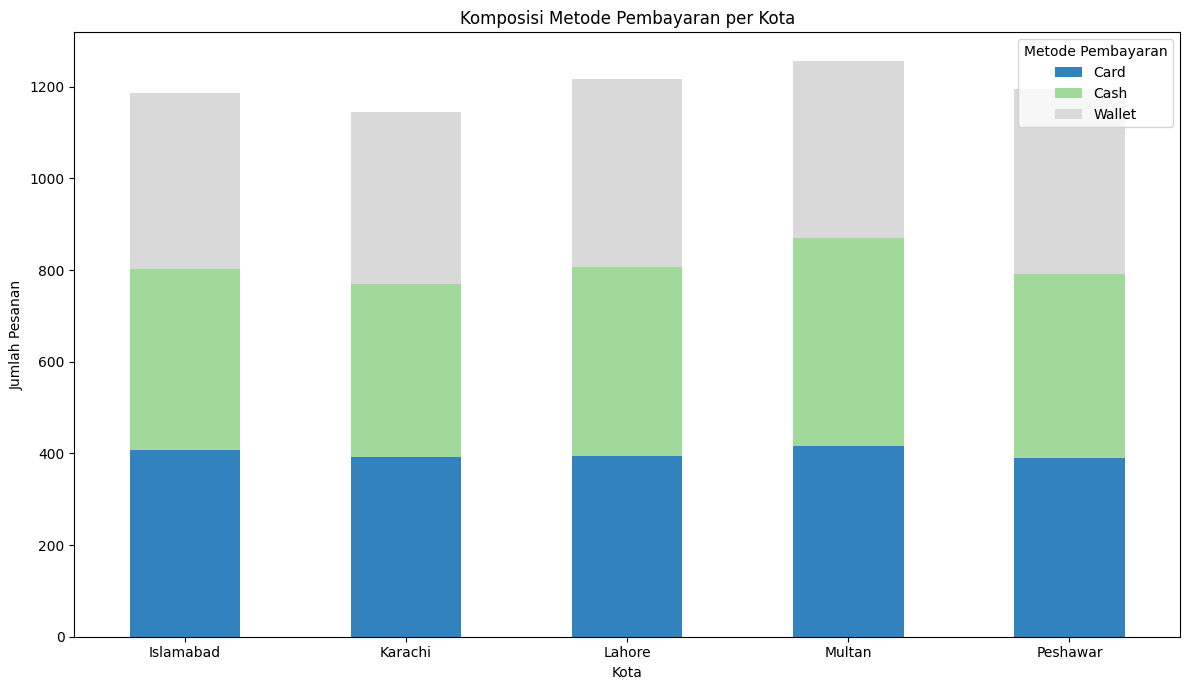

In [40]:
# Visualisasi 8: Grafik Batang Komposisi Pembayaran per Kota
payment_by_city = df.groupby(['city', 'payment_method']).size().unstack(fill_value=0)
payment_by_city.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')
plt.title('Komposisi Metode Pembayaran per Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=0)
plt.legend(title='Metode Pembayaran')
plt.tight_layout()
plt.show()